# Install dan import Library

In [ ]:
!pip install yfinance ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=dfa07e0539d4f3e2176e0bf17c4560b8a8866d17ca6607d6a39213be67aac625
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 627.5 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import yfinance as yf

import plotly.graph_objects as go

# Pemahaman Data

In [ ]:
data = yf.download("ERAA.JK", start="2011-12-01", end="2023-12-31")
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-21,398.0,424.0,396.0,420.0,401.785736,65543500
2023-12-22,418.0,424.0,404.0,404.0,386.479614,64365100
2023-12-27,404.0,420.0,402.0,416.0,397.959198,60908100
2023-12-28,416.0,426.0,410.0,414.0,396.045929,18474800
2023-12-29,414.0,426.0,408.0,426.0,407.525513,83242500


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2984 entries, 2011-12-14 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2984 non-null   float64
 1   High       2984 non-null   float64
 2   Low        2984 non-null   float64
 3   Close      2984 non-null   float64
 4   Adj Close  2984 non-null   float64
 5   Volume     2984 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 163.2 KB


,Open,High,Low,Close,Adj Close,Volume
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2.984000e+03
mean,338.969772,345.592225,331.049799,338.278753,277.177051,8.143337e+07
std,166.429675,169.390614,162.409537,165.914670,146.737345,9.697923e+07
min,78.000000,79.199997,73.800003,79.199997,59.374298,0.000000e+00
25%,196.000000,200.000000,192.000000,196.000000,142.113037,2.546252e+07
50%,323.000000,330.000000,316.000000,322.000000,265.543274,5.234150e+07
75%,488.000000,496.000000,478.000000,486.500000,407.346481,1.000295e+08
max,720.000000,725.000000,675.000000,720.000000,632.573303,1.384750e+09


In [ ]:
#Candlestick

df=yf.download('ERAA.JK', start="2023-01-01", end="2023-12-29")
fig = go.Figure(go.Candlestick(x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close']))
fig.update_layout(title='Grafik Pergerakan Harga Saham ERAA Setahun Terakhir', yaxis_title='Rupiah',width=800,height=500,)
fig.update_yaxes()
fig.show()

[*********************100%%**********************]  1 of 1 completed


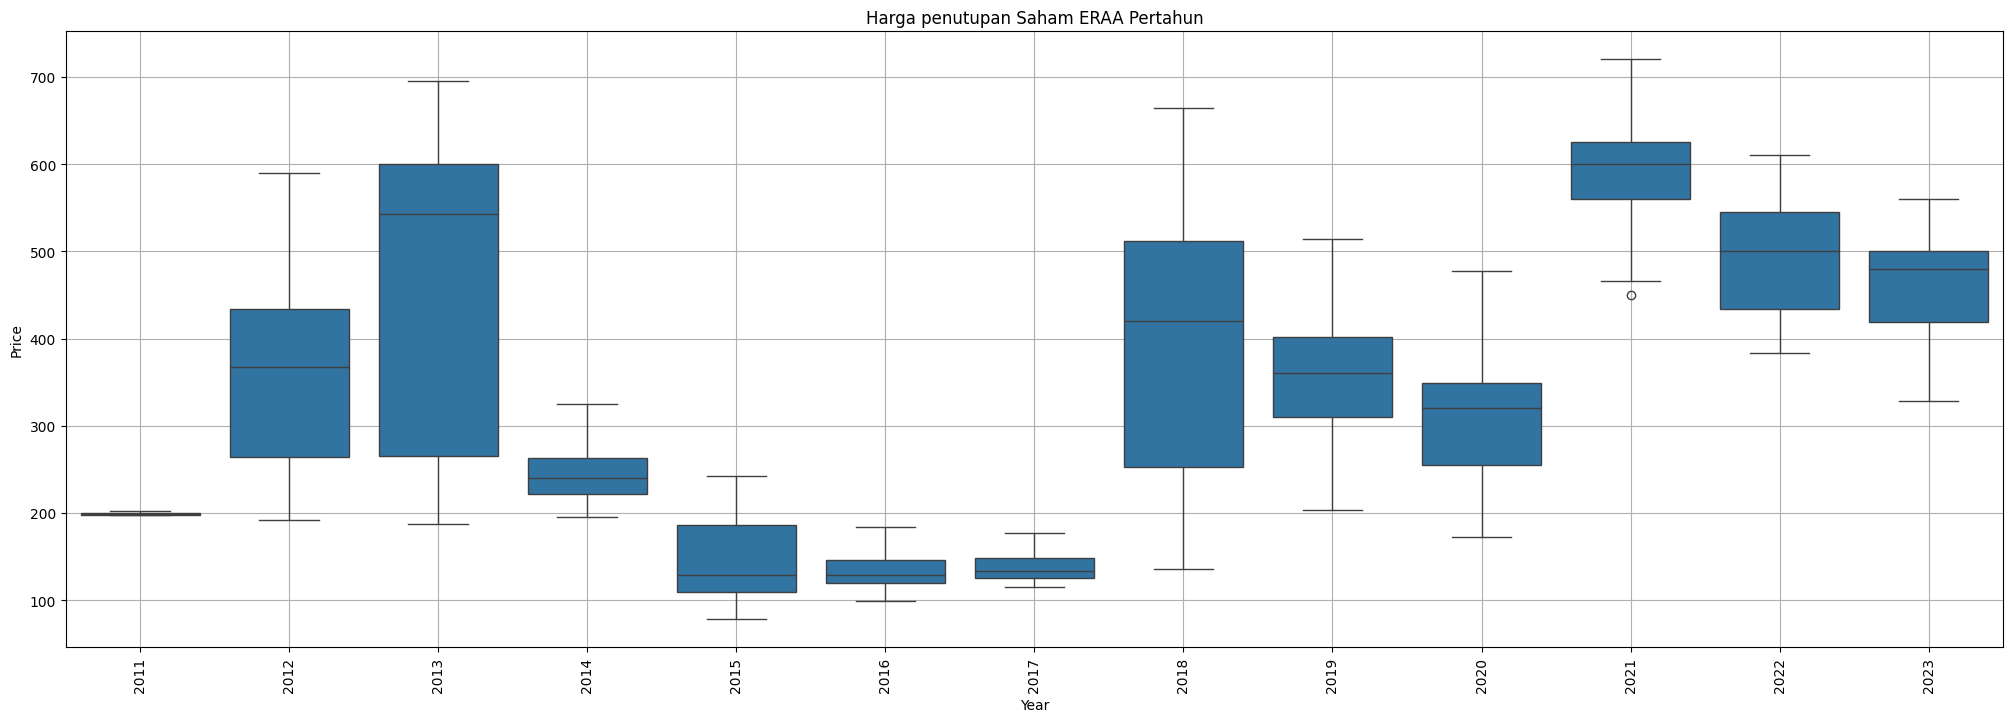

In [ ]:
#BoxPlot

plt.figure(figsize=(25,8))
sns.boxplot(x=data['Close'].index.year, y=data.values[:,0])
plt.title('Harga penutupan Saham ERAA Pertahun')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
#Koefisien Variasi Data (CV)

new_data = data[['Close']]
df = new_data.groupby(new_data.index.year).mean().rename(columns ={'Close':'Mean'})
df = df.merge(new_data.groupby(new_data.index.year).std().rename(columns ={'Close':'Std'}),left_index=True, right_index=True)
df['CV in %'] = ((df['Std']/df['Mean'])*100).round(2)

print('Koefisien Variasi Data Saham ERAA')
print(df.tail(15))

Koefisien Variasi Data Saham ERAA
            Mean         Std  CV in %
Date                                 
2011  199.333333    1.556998     0.78
2012  367.565041  104.274020    28.37
2013  448.381148  172.497886    38.47
2014  244.975410   30.313306    12.37
2015  146.471020   47.198093    32.22
2016  133.237398   19.452202    14.60
2017  137.771654   14.910107    10.82
2018  389.134100  147.551533    37.92
2019  353.023256   71.145214    20.15
2020  306.838843   57.683523    18.80
2021  592.898785   49.515394     8.35
2022  490.508130   60.053972    12.24
2023  459.271967   57.221203    12.46


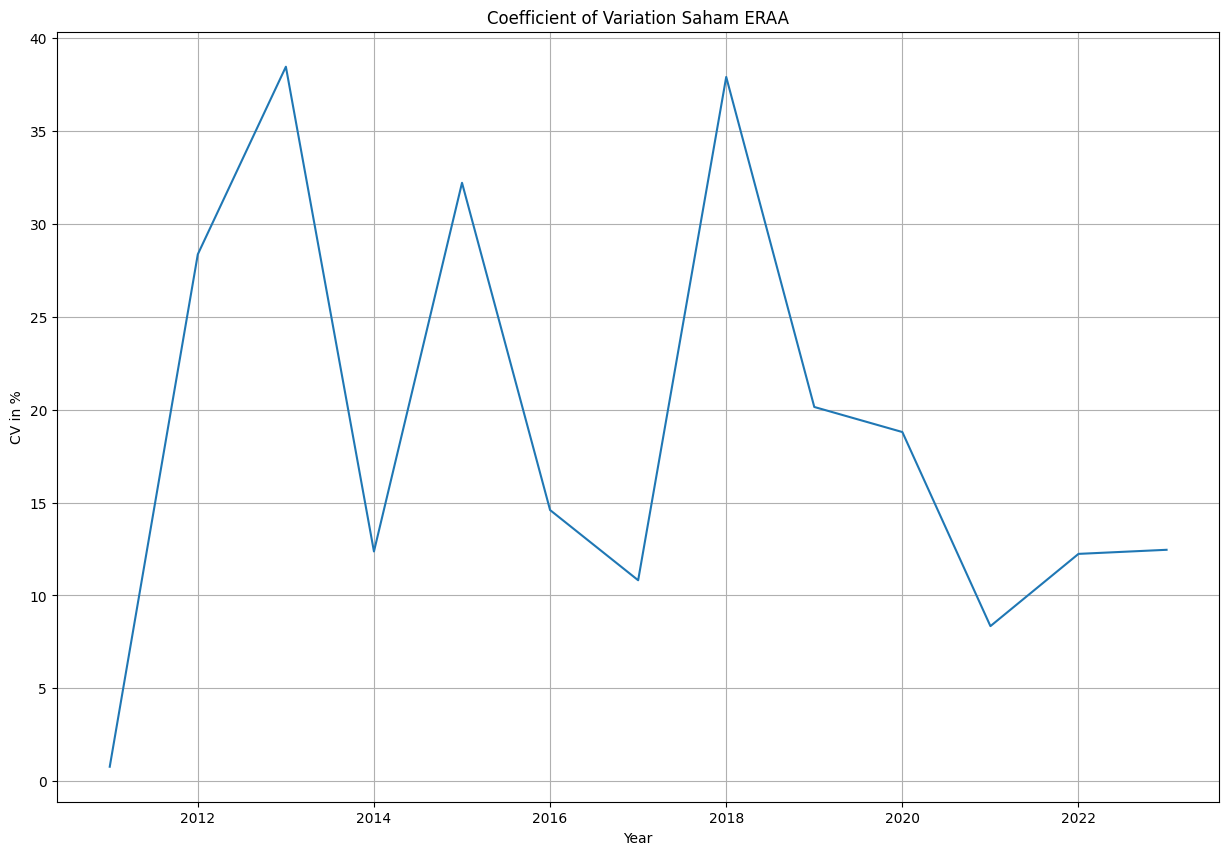

In [ ]:
#Grafik Koefisien Variasi Data

fig, ax = plt.subplots(figsize=(15, 10))
df['CV in %'].plot()
plt.title('Coefficient of Variation Saham ERAA')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

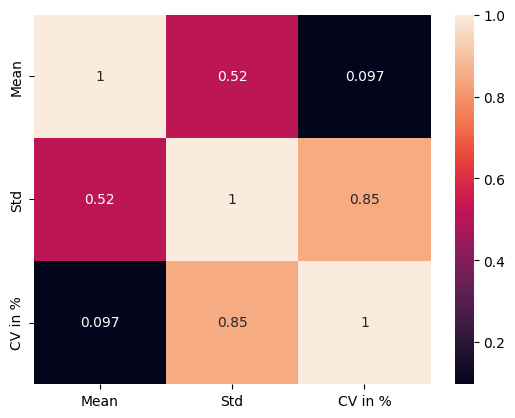

In [ ]:
#heatmap matriks korelasi

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Persiapan Data

In [ ]:
#Menghapus Nilai Null

data.dropna(inplace=True)

## Analisis Teknikal

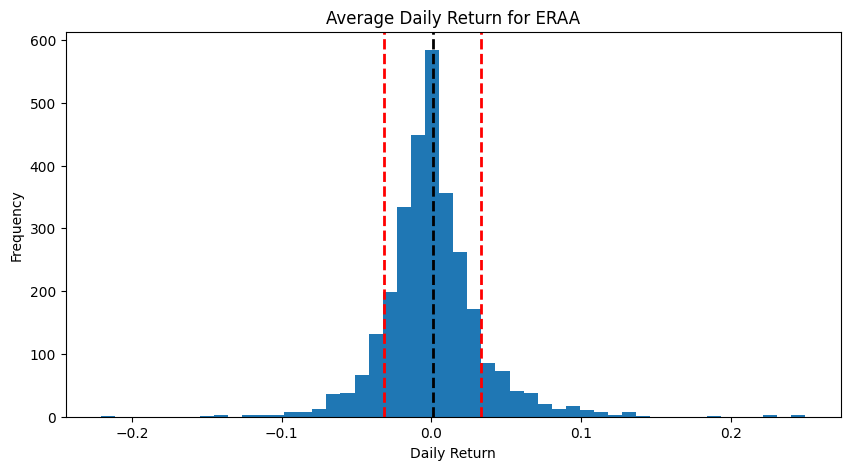

In [ ]:
#Menghitung Daily Return

df1 = data.copy()

df1['Daily_Return'] = data['Adj Close'].pct_change()
avg_daily_return = df1['Daily_Return'].mean()
std_daily_return = df1['Daily_Return'].std()

plt.figure(figsize=(10, 5))
plt.hist(df1['Daily_Return'], bins=50)
plt.title(f"Average Daily Return for ERAA")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.axvline(avg_daily_return, color='k', linestyle='dashed', linewidth=2)
plt.axvline(avg_daily_return + std_daily_return, color='r', linestyle='dashed', linewidth=2)
plt.axvline(avg_daily_return - std_daily_return, color='r', linestyle='dashed', linewidth=2)
plt.show()

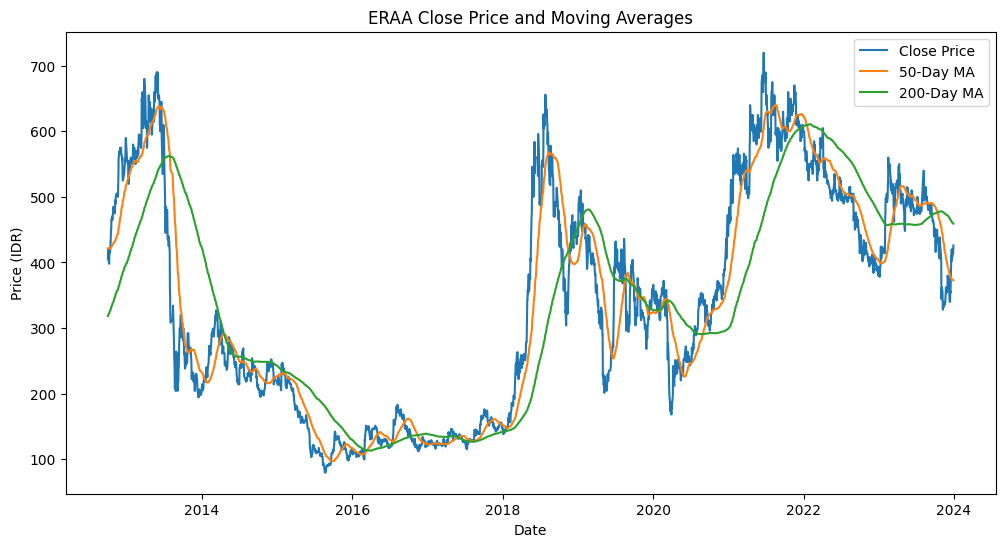

In [ ]:
#Menghitung Simple Moving Average

# Calculate moving averages
df1['50-Day MA'] = data['Close'].rolling(window=50).mean()
df1['200-Day MA'] = data['Close'].rolling(window=200).mean()

# Drop NaN values created by rolling windows
df1.dropna(inplace=True)

# Visualize the new features
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Close Price')
plt.plot(df1['50-Day MA'], label='50-Day MA')
plt.plot(df1['200-Day MA'], label='200-Day MA')
plt.title('ERAA Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.show()

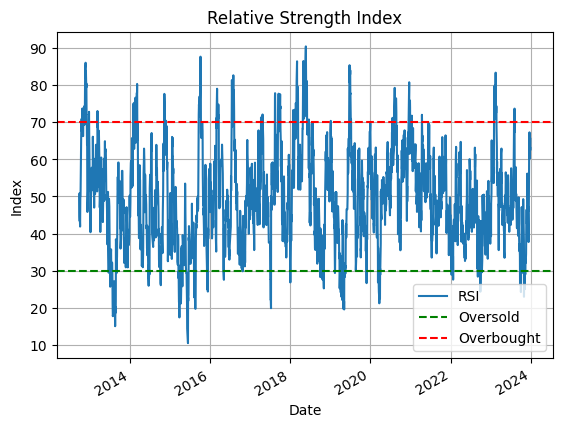

In [ ]:
#Menghitung Nilai RSI

df1['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
df1.dropna(inplace=True)

df_rsi = df1['RSI']
df_rsi.plot()
plt.title('Relative Strength Index')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend()
plt.grid()

## Pemisahan Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['Open', 'High', 'Low', 'Volume', 'Daily_Return', '50-Day MA', '200-Day MA', 'RSI']]
y = df1['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penerapan Model

## Regresi Linier

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -0.04554943909170106
slope: [ 6.88343358e-02  5.35199794e-01  3.84944927e-01 -1.07056227e-08
  1.60004752e+02  1.06831997e-02 -3.52231257e-03  1.57229577e-02]


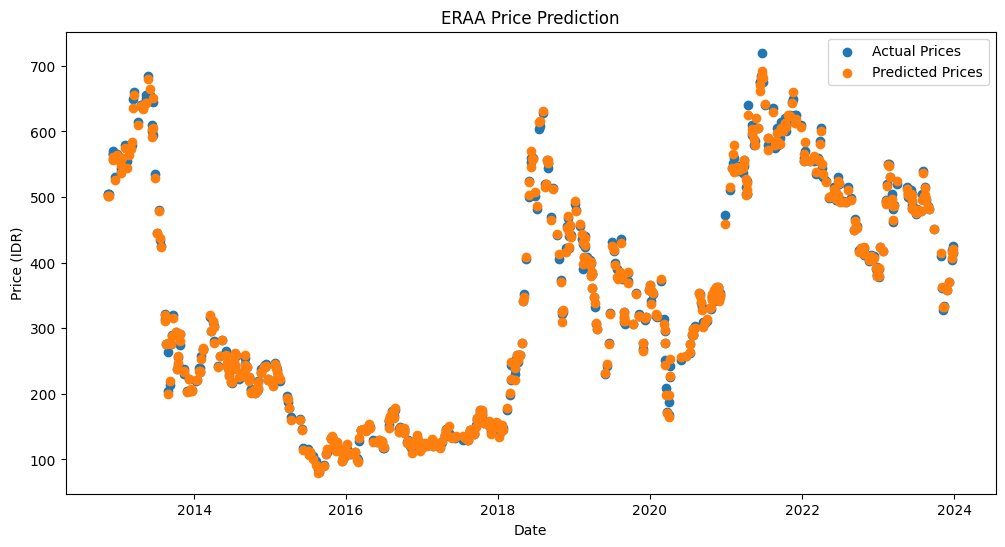

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, y_pred, label='Predicted Prices')
plt.title('ERAA Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.show()

## Regresi Pohon Keputusan

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

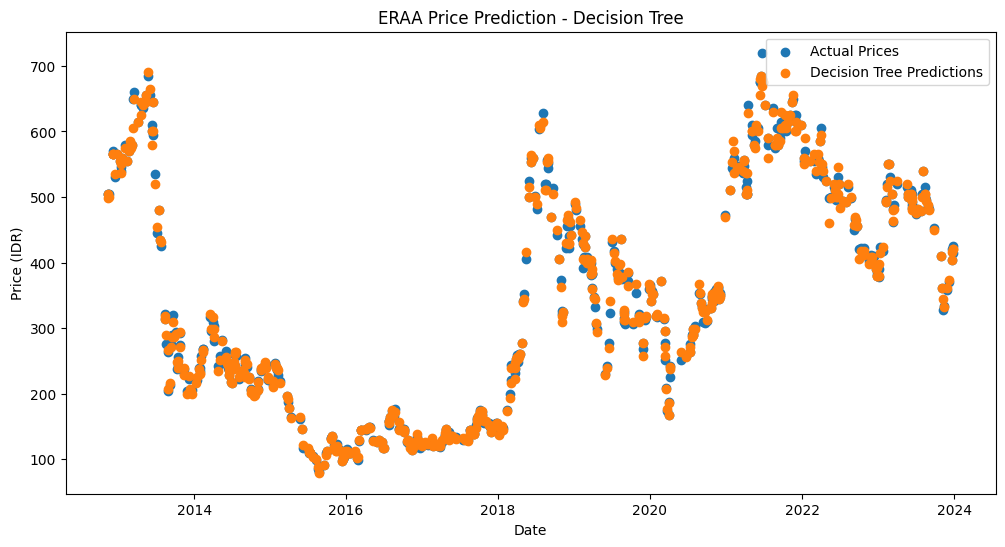

In [ ]:
#Grafik

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, dt_y_pred, label='Decision Tree Predictions')
plt.title('ERAA Price Prediction - Decision Tree')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.show()

In [ ]:
df_all = y_test.to_frame()
df_all['lr_pred'] = y_pred
df_all['dt_pred'] = dt_y_pred
df_all.sort_index(inplace=True, kind='quicksort')
df_all

,Close,lr_pred,dt_pred
Date,,,
2012-11-13,505.0,502.362485,505.0
2012-11-14,505.0,501.963061,498.0
2012-11-20,505.0,501.614102,500.0
2012-12-05,570.0,560.781660,565.0
2012-12-06,565.0,556.031180,565.0
...,...,...,...
2023-12-06,370.0,370.636118,373.0
2023-12-21,420.0,416.603613,416.0
2023-12-22,404.0,407.696322,404.0


# Evaluasi


In [ ]:
def mape(y_true, y_pred):
  """Calculate mean absolute percentage error (MAPE)"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Evaluasi Model
map = mape(y_test, y_pred)

print(f'MAPE: {map}')

MAPE: 1.0191295173862034


In [ ]:
# Evaluasi Model
dt_map = mape(y_test, dt_y_pred)

print(f'Decision Tree - MAPE: {dt_map}')

Decision Tree - MAPE: 1.2488474089160446


In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAPE': [map, dt_map]
})
results

,Model,MAPE
0,Linear Regression,1.019130
1,Decision Tree,1.248847
